# Astra - Faraday Rocketry UPV - 2022

Launched at EUROC'22. Achieved an apogee close to the target 3000m, however had a balistic descent.
Permission to use flight data given by Nacho Coello, 2024.

These results were extracted out of the flight card:

1. Team number: `13`
2. Launch date: `October 13th, 2022. 16hrs local time`
3. Simulated apogee: `--- m` #TODO
4. Official recorded apogee: `3250 m`

The relative error of altitude apogee is only `#TODO%`!

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import CylindricalTank, SolidMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

## Environment registered by windy


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2022-10-13 15:00:00 UTC | 2022-10-13 16:00:00 Portugal
Launch Site Latitude: 39.38970°
Launch Site Longitude: -8.28896°
Reference Datum: WGS84
Launch Site UTM coordinates: 44415.44 W    4373388.30 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 160.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2022-10-13 10:00:00 to 2022-10-17 17:00:00 utc
Reanalysis Hour Interval: 2 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -8.0°

Surface Atmospheric Conditions

Surface Wind Speed: 3.43 m/s
Surface Wind Direction: 316.09°
Surface Wind Heading: 136.09°
Surface Pressure: 1000.00 hPa
Surface Temperature: 298.96 K
Surface Air Density: 1.165 kg/m³
Surface Speed of Sound: 346.62 m/s


Earth Model

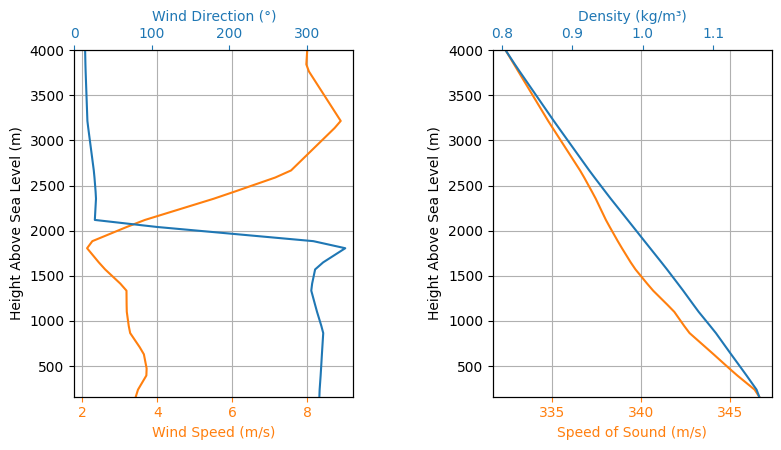

In [4]:
env = Environment(
    gravity=9.80665,
    date=(2022, 10, 13, 16),
    latitude=39.3897,
    longitude=-8.2889639,
    elevation=160,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2022_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

In [24]:
Motor = SolidMotor(
    thrust_source="../../data/rockets/astra/thrust_source.csv",
    burn_time=3.2965,
    grain_number=1,
    grain_density=1256.7753406541794,
    grain_initial_inner_radius=0.01875,
    grain_outer_radius=0.0375,
    grain_initial_height=0.486,
    nozzle_radius=0.028125,
    nozzle_position=0,
    throat_radius=0.01875,
    grain_separation=0,
    grains_center_of_mass_position=0.243,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0,
    dry_mass=0,
)

Nozzle Details
Nozzle Radius: 0.028125 m
Nozzle Throat Radius: 0.01875 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1256.7753406541794 kg/m3
Grain Outer Radius: 0.0375 m
Grain Inner Radius: 0.01875 m
Grain Height: 0.486 m
Grain Volume: 0.002 m3
Grain Mass: 2.024 kg

Motor Details
Total Burning Time: 3.2965 s
Total Propellant Mass: 2.024 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2109.076 m/s
Average Thrust: 1294.812 N
Maximum Thrust: 1540.3 N at 1.2565 s after ignition.
Total Impulse: 4268.348 Ns



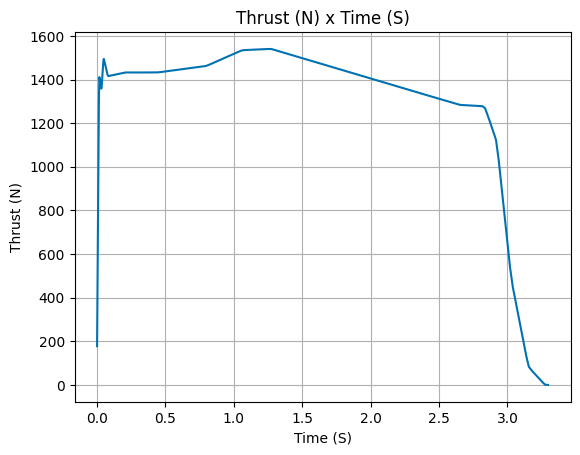

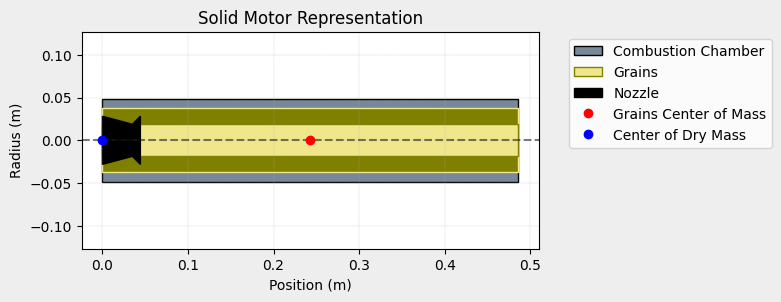

In [35]:
Motor.info()
Motor.draw()

## Rocket and Aerodynamic surfaces

In [32]:
Astra = Rocket(
    radius=0.047,
    mass=10.8462,
    inertia=(6.6986, 6.6986, 0.040824),
    center_of_mass_without_motor=1.3957,
    power_off_drag="../../data/rockets/astra/drag_coefficient.csv",
    power_on_drag="../../data/rockets/astra/drag_coefficient.csv",
    coordinate_system_orientation="tail_to_nose",
)

Astra.set_rail_buttons(1.5957, 1.1957)

Astra.add_motor(Motor, position=0.7146163949)

In [33]:
NoseCone = Astra.add_nose(
    length=0.27,
    kind="vonKarman",
    position=2.5214,
)

FinSet = Astra.add_trapezoidal_fins(
    n=4,
    span=0.117,
    root_chord=0.2,
    tip_chord=0.118,
    position=0.7134,
)


Inertia Details

Rocket Mass: 10.846 kg (without motor)
Rocket Dry Mass: 10.846 kg (with unloaded motor)
Rocket Loaded Mass: 12.870 kg
Rocket Structural Mass Ratio: 0.843
Rocket Inertia (with unloaded motor) 11: 6.699 kg*m2
Rocket Inertia (with unloaded motor) 22: 6.699 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.041 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.047 m
Rocket Frontal Area: 0.006940 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 0.681 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.438 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.069 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 14.061/rad

Center of Pressure

Nos

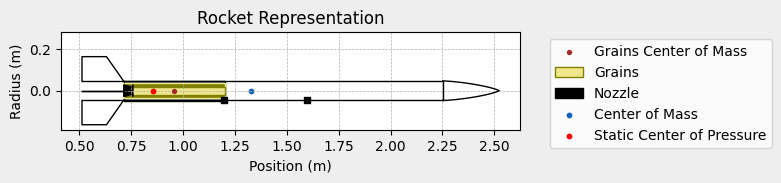

In [34]:
Astra.prints.all()
Astra.draw()

## Flight Simulation DATA

In [66]:
test_flight = Flight(
    rocket=Astra, environment=env, inclination=84, heading=133, rail_length=12
)


Apogee State

Apogee Time: 25.838 s
Apogee Altitude: 3774.946 m (ASL) | 3614.946 m (AGL)
Apogee Freestream Speed: 17.988 m/s
Apogee X position: 403.642 m
Apogee Y position: -405.426 m
Apogee latitude: 39.3850450°
Apogee longitude: -8.2831163°


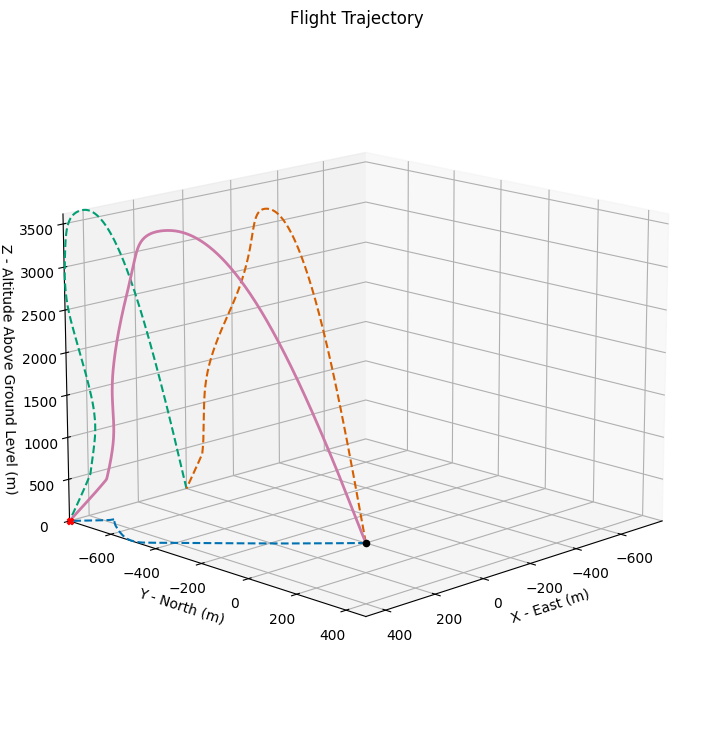

In [67]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

## Data analysis

In [71]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "t(s)": "time",
    "alt(m)": "altitude",
    "vz(m/s)": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/Astra/flight_data.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


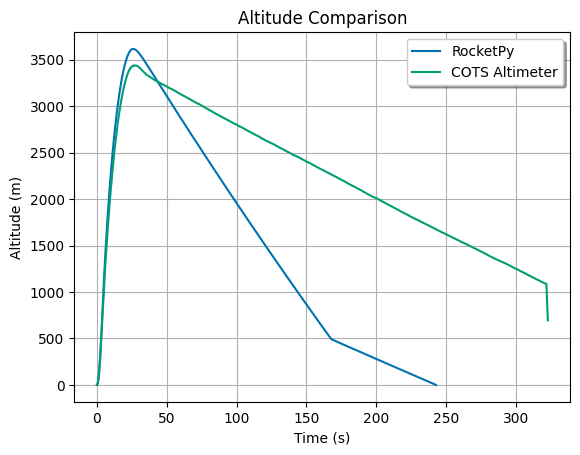

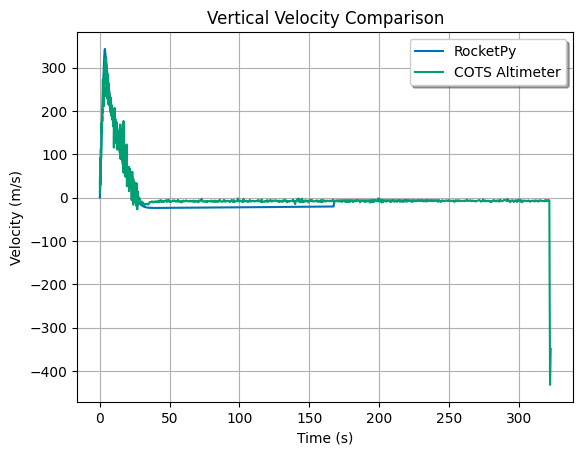

In [72]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)